# Set Up

## Set Up Environment

In [1]:
# Set up environment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

import math

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
# read in data to dataframe
df = pd.read_csv('../databases/data_cleaned.csv')
# verify
display(df.head())
df['constant'] = 1

# import dirty data to perform conversions
df_dirty = pd.read_csv('../databases/data_merged.csv')
# verify
display(df_dirty.head())

# import results dataframe for reference
with open('../databases/individual_results_df.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    individual_results = pickle.load(f)
# verify
display(individual_results)

# import models dictionary for reference
with open('../databases/individual_models.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    individual_models = pickle.load(f)
# verify
display(individual_models)


,id,date,price,zipcode,bedrooms_scaled,bathrooms_scaled,sqft_living_scaled,sqft_lot_scaled,floors_scaled,condition_scaled,grade_scaled,sqft_above_scaled,yr_built_scaled,lat_scaled,long_scaled,sqft_living15_scaled,sqft_lot15_scaled,population_scaled,test_rate_scaled,positive_rate_scaled,hospitalization_rate_scaled,death_rate_scaled,price_log_scaled,sqft_living_log_scaled,sqft_above_log_scaled,sqft_living15_log_scaled,year_sold_scaled,day_of_year_sold_scaled,month_sold_scaled,waterfront,view,sqft_basement,yr_renovated,waterfront_binary,view_binary,sqft_basement_binary,yr_renovated_binary
0,7129300520,2014-10-13,221900.0,98178,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,-0.629972,-0.560787,-0.735234,-0.544665,-0.352886,-0.305688,-0.943654,-0.260621,-0.650952,0.258609,1.035963,0.246942,-0.137903,-1.401998,-1.125556,-0.753565,-1.035429,-0.690651,1.073493,1.099828,0.0,0.0,0.0,0,0,0,0,0
1,4060000240,2014-06-23,205425.0,98178,-1.482459,-1.451039,-1.307389,-0.200891,-0.915531,0.907199,-1.413157,-1.097658,-0.885088,-0.427227,-0.241733,-1.162558,-0.219190,-0.650952,0.258609,1.035963,0.246942,-0.137903,-1.548509,-1.817102,-1.440337,-1.397958,-0.690651,-0.108722,-0.184256,0.0,0.0,0.0,0,0,0,0,0
2,4058801670,2014-07-17,445000.0,98178,-0.402894,0.174482,0.021433,-0.166577,-0.915531,-0.629972,0.291583,-0.203678,-0.136158,-0.368043,-0.213308,0.982705,-0.148354,-0.650952,0.258609,1.035963,0.246942,-0.137903,-0.080488,0.233320,-0.011627,1.058388,-0.690651,0.144610,0.136765,0.0,2.0,480.0,0,0,1,1,0
3,2976800796,2014-09-25,236000.0,98178,-0.402894,-1.451039,-0.849926,-0.222188,-0.915531,-0.629972,-0.560787,-0.590264,-0.340412,-0.395469,-0.291476,-0.972841,-0.188429,-0.650952,0.258609,1.035963,0.246942,-0.137903,-1.285002,-0.897239,-0.526825,-1.081351,-0.690651,0.883494,0.778807,0.0,0.0,0.0,0,0,0,0,0
4,6874200960,2015-02-27,170000.0,98178,-1.482459,-1.451039,-1.329173,-0.237474,-0.915531,-0.629972,-1.413157,-1.121819,-1.361680,-0.399078,-0.412280,-0.491251,-0.146045,-0.650952,0.258609,1.035963,0.246942,-0.137903,-1.907982,-1.871299,-1.494159,-0.399928,1.447842,-1.333159,-1.468340,0.0,0.0,0.0,0,0,0,0,0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Population,Test_Rate,Positive_Rate,Hospitalization_Rate,Death_Rate
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,26649,97.08,7.39,0.83,0.23
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,4,6,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,26649,97.08,7.39,0.83,0.23
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,3,8,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,26649,97.08,7.39,0.83,0.23
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,3,7,1300,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,26649,97.08,7.39,0.83,0.23
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,3,6,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,26649,97.08,7.39,0.83,0.23


,ind_var,r_squared,intercept,slope,p_value,normality_JB
0,bedrooms_scaled,0.117896,1.362842e-15,0.343360,0.000000e+00,1471.526272
1,bathrooms_scaled,0.303876,1.362842e-15,0.551249,0.000000e+00,196.538139
2,sqft_lot_scaled,0.010005,1.362842e-15,0.100025,3.804476e-49,1107.438752
3,floors_scaled,0.096491,1.362842e-15,0.310630,0.000000e+00,1031.278553
4,condition_scaled,0.001515,1.362842e-15,0.038918,1.057555e-08,1086.242703
5,grade_scaled,0.495222,1.362842e-15,0.703720,0.000000e+00,133.707522
6,yr_built_scaled,0.006494,1.362842e-15,0.080583,1.885764e-32,1134.384919
7,lat_scaled,0.201455,-1.395715e-14,0.448837,0.000000e+00,2761.328140
8,long_scaled,0.002587,1.835988e-15,0.050862,7.483674e-14,1163.717131
9,population_scaled,0.009362,1.362842e-15,-0.096757,4.358327e-46,1001.481340


{'bedrooms_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a2248b2908>,
 'bathrooms_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc278d0>,
 'sqft_lot_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc3b748>,
 'floors_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc42198>,
 'condition_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc49320>,
 'grade_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc515c0>,
 'yr_built_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc58828>,
 'lat_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc58f60>,
 'long_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc5dd68>,
 'population_scaled': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a22bc67cf8>,


## Functions

In [3]:
def get_model_results(df, x_cols, y='price_log_scaled'):
    """
    """
    x_cols.append('constant')
    
    # Defining the problem
    X = df[x_cols]
    y = df[y]

    # Split df into training and testing 75-25
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # This procedure below is how the model is fit in Statsmodels
    model = sm.OLS(endog=y_train, exog=X_train)
    results = model.fit()
    
    return model, results, X_train, y_train, X_test, y_test

note: statsmodels.OLS is faster than statsmodels.formula.api.ols and is, therefore, preferred in this use-case.

In [4]:
# make a function for standardizing
def reverse_standardize(data_point, series):
    """Performs standardization scaling on a Pandas series and returns result
    
    Takes a numerical Pandas series and applies the following formula
    to every element:
    
    x = x' * std + x_bar
    
    where x_bar is mean of x and std is standard deviation of x
    
    This results in mean = 0 and std = 1
    
    Keyword arguments:
    series -- numerical Pandas series
    """
    return data_point*series.std() + series.mean()

# Model 1 (df1)

Let's try to model only those features that have R^2 greater 0.1 and see how it performs.

In [5]:
r_sig1 = individual_results['r_squared'] > 0.1
x_cols1 = individual_results[r_sig1]['ind_var'].to_list()

model1, results1, X_train1, y_train1, X_test1, y_test1 = get_model_results(df, x_cols1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_log_scaled   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     5181.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:27:51   Log-Likelihood:                -11956.
No. Observations:               16197   AIC:                         2.393e+04
Df Residuals:                   16187   BIC:                         2.401e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedrooms_scaled             -0.0013      0.005     -0.249      0.804      -0.012       0.009
bathrooms_scaled             0.0043      0.006      0.672      0.502      -0.008       0.017
grade_scaled                 0.3155      0.007     46.068      0.000       0.302       0.329
lat_scaled                   0.3360      0.004     76.622      0.000       0.327       0.345
positive_rate_scaled        -0.1549      0.005    -34.132      0.000      -0.164      -0.146
sqft_living_log_scaled       0.3543      0.010     34.420      0.000       0.334       0.375
sqft_above_log_scaled       -0.0552      0.009     -6.391      0.000      -0.072      -0.038
sqft_living15_log_scaled     0.0650      0.006     10.126      0.000       0.052       0.078
view_binary                  0.5089      0.014     35.528      0.000       0.481       0.537
constant                    -0.0547      0.004    -12.981      0.000      -0.063      -0.046
==============================================================================
Omnibus:                      606.381   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              930.141
Skew:                           0.354   Prob(JB):                    1.05e-202
Kurtosis:                       3.936   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Drop features with insignificant p-values.

In [6]:
mask = results1.pvalues < .05
x_cols1 = results1.pvalues[mask].reset_index()['index'].to_list()
x_cols1.remove('constant')
model1, results1, X_train1, y_train1, X_test1, y_test1 = get_model_results(df, x_cols1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_log_scaled   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     6662.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:27:51   Log-Likelihood:                -11957.
No. Observations:               16197   AIC:                         2.393e+04
Df Residuals:                   16189   BIC:                         2.399e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
grade_scaled                 0.3168      0.007     48.157      0.000       0.304       0.330
lat_scaled                   0.3359      0.004     76.672      0.000       0.327       0.344
positive_rate_scaled        -0.1551      0.005    -34.331      0.000      -0.164      -0.146
sqft_living_log_scaled       0.3558      0.009     40.452      0.000       0.339       0.373
sqft_above_log_scaled       -0.0550      0.009     -6.368      0.000      -0.072      -0.038
sqft_living15_log_scaled     0.0648      0.006     10.114      0.000       0.052       0.077
view_binary                  0.5090      0.014     35.628      0.000       0.481       0.537
constant                    -0.0547      0.004    -12.991      0.000      -0.063      -0.046
==============================================================================
Omnibus:                      605.430   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              929.974
Skew:                           0.353   Prob(JB):                    1.14e-202
Kurtosis:                       3.937   Cond. No.                         6.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## RMSE

In [7]:
# calculate RMSE for training set
y_hat_train1 = results1.predict(X_train1)
rmse = math.sqrt(mean_squared_error(y_hat_train1,y_train1))
np.exp(reverse_standardize(rmse, np.log(df['price'])))

606084.0872824425

In [8]:
# calculate RMSE for testing set
y_hat_test1 = results1.predict(X_test1)
rmse = math.sqrt(mean_squared_error(y_hat_test1,y_test1))
np.exp(reverse_standardize(rmse, np.log(df['price'])))

606670.05297508

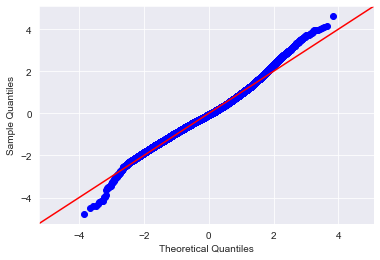

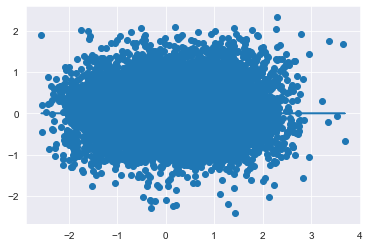

In [9]:
sm.graphics.qqplot(results1.resid, dist=stats.norm, line='45', fit=True)
plt.show()
plt.scatter(results1.predict(X_train1), results1.resid)
plt.plot(results1.predict(X_train1), [0 for i in range(len(X_train1))])

This model is okay other than the Jarque-Bera.

## VIF

In [26]:
# Your code here
X1 = df[x_cols1]
vifs = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
mask = vifs >= 4
vifs[mask]

sqft_living_log_scaled    4.925487
sqft_above_log_scaled     4.702627
dtype: float64

Based on the adjusted R^2, about 55.7% of the variance is explained by this model using only `sqft_living_log_scaled` and `positive_rate_scaled`.

Other than the modest R^2, another area of concern is the high and significant Jarque-Bera value (336.539 at Prob 8.35e-74) which suggests the error is not normally distributed and, therefore, does not meet the requirements of linear regression.

## K-Fold

In [53]:
X1 = df[x_cols1]
y1 = df['price_log_scaled'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

reg1 = LinearRegression().fit(X_train1, y_train1)
reg1.score(X_train1,y_train1)

scores = cross_val_score(reg1,X1,y1, cv=10, scoring = 'neg_mean_squared_error')
cross_vals = pd.DataFrame(np.sqrt(np.abs(scores)))

,0
0,0.520452
1,0.427408
2,0.574694
3,0.528255
4,0.426007
5,0.467140
6,0.638276
7,0.518683
8,0.448767
9,0.617794


# Model 2 (df2)

In [10]:
# Defining the problem
y_col2 = 'price_log_scaled'
x_cols2 = list(df.columns)
drops = ['id', 'date', 'zipcode', 'price', 'price_log_scaled', 'waterfront', 'view', 'sqft_basement', 'yr_renovated', 'sqft_living_scaled', 'sqft_above_scaled', 'sqft_living15_scaled', 'sqft_lot15_scaled', 'constant']
for col in drops:
    x_cols2.remove(col)

model2, results2, X_train2, y_train2, X_test2, y_test2 = get_model_results(df, x_cols2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_log_scaled   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     2993.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:27:52   Log-Likelihood:                -9218.6
No. Observations:               16197   AIC:                         1.849e+04
Df Residuals:                   16172   BIC:                         1.868e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
bedrooms_scaled                -0.0120      0.004     -2.694      0.007      -0.021      -0.003
bathrooms_scaled                0.0742      0.006     12.179      0.000       0.062       0.086
sqft_lot_scaled                 0.0231      0.004      6.590      0.000       0.016       0.030
floors_scaled                  -0.0398      0.005     -7.686      0.000      -0.050      -0.030
condition_scaled                0.0838      0.004     22.291      0.000       0.076       0.091
grade_scaled                    0.3037      0.006     49.890      0.000       0.292       0.316
yr_built_scaled                -0.0941      0.005    -17.241      0.000      -0.105      -0.083
lat_scaled                      0.2279      0.005     49.878      0.000       0.219       0.237
long_scaled                     0.0094      0.005      1.775      0.076      -0.001       0.020
population_scaled               0.0079      0.004      2.193      0.028       0.001       0.015
test_rate_scaled                0.2380      0.006     41.844      0.000       0.227       0.249
positive_rate_scaled           -0.1911      0.007    -26.709      0.000      -0.205      -0.177
hospitalization_rate_scaled    -0.0306      0.010     -3.015      0.003      -0.050      -0.011
death_rate_scaled               0.0290      0.007      3.883      0.000       0.014       0.044
sqft_living_log_scaled          0.1656      0.014     11.713      0.000       0.138       0.193
sqft_above_log_scaled           0.1637      0.014     11.607      0.000       0.136       0.191
sqft_living15_log_scaled        0.1460      0.006     25.776      0.000       0.135       0.157
year_sold_scaled                0.0536      0.005      9.844      0.000       0.043       0.064
day_of_year_sold_scaled        -0.0573      0.037     -1.547      0.122      -0.130       0.015
month_sold_scaled               0.0665      0.037      1.802      0.072      -0.006       0.139
waterfront_binary               1.0179      0.045     22.807      0.000       0.930       1.105
view_binary                     0.2563      0.013     20.055      0.000       0.231       0.281
sqft_basement_binary            0.0630      0.014      4.552      0.000       0.036       0.090
yr_renovated_binary             0.1686      0.019      8.739      0.000       0.131       0.206
constant                       -0.0648      0.006    -10.086      0.000      -0.077      -0.052
==============================================================================
Omnibus:                      609.876   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1514.762
Skew:                           0.191   Prob(JB):                         0.00
Kurtosis:                       4.449   Cond. No.                         35.7


## RMSE

In [11]:
mask2 = results2.pvalues < .05
x_cols2 = results2.pvalues[mask2].reset_index()['index'].to_list()
x_cols2.remove('constant')
model2, results2, X_train2, y_train2, X_test2, y_test2 = get_model_results(df, x_cols2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_log_scaled   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     3419.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:27:52   Log-Likelihood:                -9223.1
No. Observations:               16197   AIC:                         1.849e+04
Df Residuals:                   16175   BIC:                         1.866e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
bedrooms_scaled                -0.0120      0.004     -2.680      0.007      -0.021      -0.003
bathrooms_scaled                0.0739      0.006     12.135      0.000       0.062       0.086
sqft_lot_scaled                 0.0237      0.003      6.791      0.000       0.017       0.031
floors_scaled                  -0.0397      0.005     -7.679      0.000      -0.050      -0.030
condition_scaled                0.0838      0.004     22.304      0.000       0.076       0.091
grade_scaled                    0.3025      0.006     49.935      0.000       0.291       0.314
yr_built_scaled                -0.0929      0.005    -17.137      0.000      -0.104      -0.082
lat_scaled                      0.2279      0.005     49.884      0.000       0.219       0.237
population_scaled               0.0069      0.004      1.931      0.053      -0.000       0.014
test_rate_scaled                0.2331      0.005     46.767      0.000       0.223       0.243
positive_rate_scaled           -0.1915      0.007    -26.794      0.000      -0.206      -0.178
hospitalization_rate_scaled    -0.0344      0.010     -3.455      0.001      -0.054      -0.015
death_rate_scaled               0.0324      0.007      4.488      0.000       0.018       0.047
sqft_living_log_scaled          0.1657      0.014     11.712      0.000       0.138       0.193
sqft_above_log_scaled           0.1646      0.014     11.671      0.000       0.137       0.192
sqft_living15_log_scaled        0.1469      0.006     26.047      0.000       0.136       0.158
year_sold_scaled                0.0463      0.003     13.703      0.000       0.040       0.053
waterfront_binary               1.0155      0.045     22.763      0.000       0.928       1.103
view_binary                     0.2542      0.013     19.954      0.000       0.229       0.279
sqft_basement_binary            0.0626      0.014      4.522      0.000       0.035       0.090
yr_renovated_binary             0.1689      0.019      8.759      0.000       0.131       0.207
constant                       -0.0644      0.006    -10.038      0.000      -0.077      -0.052
==============================================================================
Omnibus:                      608.495   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1511.665
Skew:                           0.190   Prob(JB):                         0.00
Kurtosis:                       4.447   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
mask2 = results2.pvalues < .05
x_cols2 = results2.pvalues[mask2].reset_index()['index'].to_list()
x_cols2.remove('constant')
model2, results2, X_train2, y_train2, X_test2, y_test2 = get_model_results(df, x_cols2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_log_scaled   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     3589.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:27:52   Log-Likelihood:                -9224.9
No. Observations:               16197   AIC:                         1.849e+04
Df Residuals:                   16176   BIC:                         1.865e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
bedrooms_scaled                -0.0116      0.004     -2.608      0.009      -0.020      -0.003
bathrooms_scaled                0.0738      0.006     12.113      0.000       0.062       0.086
sqft_lot_scaled                 0.0229      0.003      6.613      0.000       0.016       0.030
floors_scaled                  -0.0392      0.005     -7.581      0.000      -0.049      -0.029
condition_scaled                0.0841      0.004     22.376      0.000       0.077       0.091
grade_scaled                    0.3030      0.006     50.045      0.000       0.291       0.315
yr_built_scaled                -0.0932      0.005    -17.182      0.000      -0.104      -0.083
lat_scaled                      0.2278      0.005     49.863      0.000       0.219       0.237
test_rate_scaled                0.2332      0.005     46.807      0.000       0.223       0.243
positive_rate_scaled           -0.1904      0.007    -26.724      0.000      -0.204      -0.176
hospitalization_rate_scaled    -0.0341      0.010     -3.427      0.001      -0.054      -0.015
death_rate_scaled               0.0330      0.007      4.569      0.000       0.019       0.047
sqft_living_log_scaled          0.1654      0.014     11.695      0.000       0.138       0.193
sqft_above_log_scaled           0.1640      0.014     11.636      0.000       0.136       0.192
sqft_living15_log_scaled        0.1471      0.006     26.075      0.000       0.136       0.158
year_sold_scaled                0.0463      0.003     13.703      0.000       0.040       0.053
waterfront_binary               1.0146      0.045     22.744      0.000       0.927       1.102
view_binary                     0.2521      0.013     19.860      0.000       0.227       0.277
sqft_basement_binary            0.0629      0.014      4.548      0.000       0.036       0.090
yr_renovated_binary             0.1683      0.019      8.725      0.000       0.130       0.206
constant                       -0.0644      0.006    -10.024      0.000      -0.077      -0.052
==============================================================================
Omnibus:                      601.885   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.022
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                       4.442   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# calculate RMSE for testing set
y_hat_test2 = results2.predict(X_test2)
rmse = math.sqrt(mean_squared_error(y_hat_test2,y_test2))
np.exp(reverse_standardize(rmse, np.log(df['price'])))

581406.8733495587

In [17]:
# calculate RMSE for training set
y_hat_train2 = results2.predict(X_train2)
rmse = math.sqrt(mean_squared_error(y_hat_train2,y_train2))
np.exp(reverse_standardize(rmse, np.log(df['price'])))

581522.674637711

## VIF

In [25]:
# Your code here
X2 = df[x_cols2]
vifs = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index=X2.columns)
mask = vifs >= 4
vifs[mask]

positive_rate_scaled            4.390614
hospitalization_rate_scaled     8.789908
death_rate_scaled               4.656742
sqft_living_log_scaled         16.828785
sqft_above_log_scaled          17.621675
sqft_basement_binary            4.049660
dtype: float64

## K-Fold

In [52]:
X2 = df[x_cols2]
y2 = df['price_log_scaled'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

reg2 = LinearRegression().fit(X_train2, y_train2)
reg2.score(X_train2,y_train2)

scores2 = cross_val_score(reg2,X2,y2, cv=20, scoring = 'neg_mean_squared_error')
cval_rmses2 = np.sqrt(np.abs(scores2))
# pd.DataFrame(cval_rmses).hist(bins='auto')
cval_rmse_mean2 = cval_rmses2.mean()

np.exp(reverse_standardize(cval_rmse_mean2, np.log(df['price'])))

583919.5012593181